In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
music = pd.read_csv("music_final.csv")

In [3]:
music = music.drop(columns='Unnamed: 0')

In [4]:
music = music.dropna()

In [5]:
music = music[music["song.hotness"]>0]

In [6]:
medium = music[(music["artist.hotness"]<=0.63) & (music["artist.hotness"]>=0.3)]

In [7]:
music.columns

Index(['artist.name', 'artist.hotness', 'Songs', 'Year', 'bars_confidence',
       'bars_start', 'beats_confidence', 'beats_start', 'duration',
       'end_of_fade_in', 'familiarity', 'key', 'key_confidence', 'location',
       'loudness', 'mode', 'mode_confidence', 'release.id', 'release.name',
       'similar', 'song.hotness', 'start_of_fade_out', 'tatums_confidence',
       'tatums_start', 'tempo', 'terms', 'grouped_terms', 'terms_freq',
       'time_signature', 'time_signature_confidence', 'decade'],
      dtype='object')

In [8]:
df_medium = medium[['artist.hotness', 'duration', 'start_of_fade_out',
       'end_of_fade_in', 'key',
       'loudness', 'mode', 
       'song.hotness', 'tempo', 'grouped_terms', 
       'time_signature',"decade"]]

In [9]:
df_medium = pd.get_dummies(df_medium, columns=["key","grouped_terms","time_signature", "decade"])

In [10]:
df_medium.columns

Index(['artist.hotness', 'duration', 'start_of_fade_out', 'end_of_fade_in',
       'loudness', 'mode', 'song.hotness', 'tempo', 'key_0', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'grouped_terms_R&B', 'grouped_terms_christian',
       'grouped_terms_classical', 'grouped_terms_country',
       'grouped_terms_electronic', 'grouped_terms_hip hop',
       'grouped_terms_hip hop ', 'grouped_terms_jazz', 'grouped_terms_latin',
       'grouped_terms_metal', 'grouped_terms_pop', 'grouped_terms_punk',
       'grouped_terms_rock', 'grouped_terms_spoken', 'grouped_terms_world',
       'time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'time_signature_7',
       'decade_00s', 'decade_10s', 'decade_80s', 'decade_90s'],
      dtype='object')

# PCA

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [12]:
def std(x):
    return (x - x.mean()) / x.std()

df_medium['artist.hotness'] = std(df_medium['artist.hotness'])
df_medium['song.hotness'] = std(df_medium['song.hotness'])
df_medium['tempo'] = std(df_medium['tempo'])
df_medium['duration'] = std(df_medium['duration'])
df_medium['start_of_fade_out'] = std(df_medium['start_of_fade_out'])
df_medium['end_of_fade_in'] = std(df_medium['end_of_fade_in'])
df_medium['loudness'] = std(df_medium['loudness'])

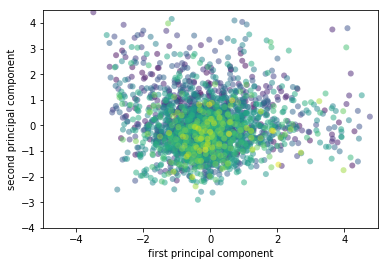

In [14]:
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_medium.drop(columns=["song.hotness","artist.hotness"]))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = df_medium['song.hotness'], 
            edgecolor='none', alpha=0.5)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.xlim(-5,5)
plt.ylim(-4,4.5)
plt.show()

<IPython.core.display.Javascript object>


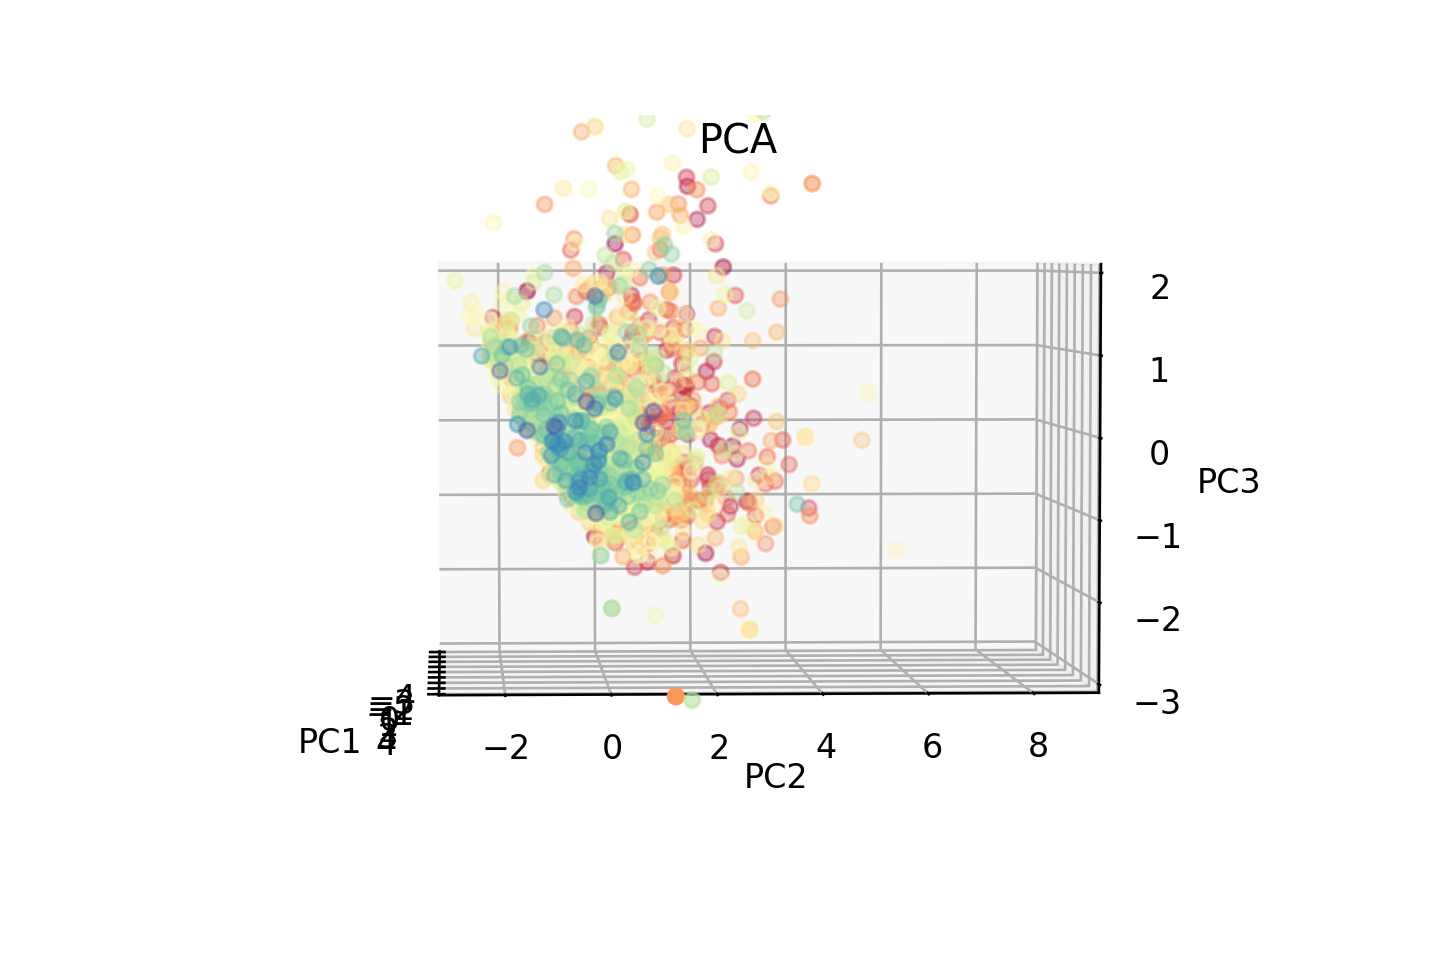

In [19]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_medium.drop(columns=["song.hotness","artist.hotness"]))

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
           c=df_medium['song.hotness'],cmap=plt.cm.Spectral)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA")
ax.set_xlim(-4,4)
ax.set_ylim(-3,9)
ax.set_zlim(-3,2)
plt.show()

In [ ]:
components = pca.components_

plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(df_medium.columns[i], feature_contribution)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

# Lasso

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(df_medium.drop(columns='song.hotness'), df_medium['song.hotness'])

In [ ]:
clf.score